In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import glob

In [2]:
files = glob.glob("imagens/*")
files

['imagens/russia.jpg',
 'imagens/blue-man-group.jpg',
 'imagens/willy-wonka.jpg',
 'imagens/tv-image-test.png',
 'imagens/seven.jpg']

In [3]:
imagem = cv2.imread(files[0], cv2.IMREAD_COLOR)

print(type(imagem))
print(imagem.shape[0])
print(imagem.shape[1])
print(imagem.shape[2])

<class 'numpy.ndarray'>
1024
1536
3


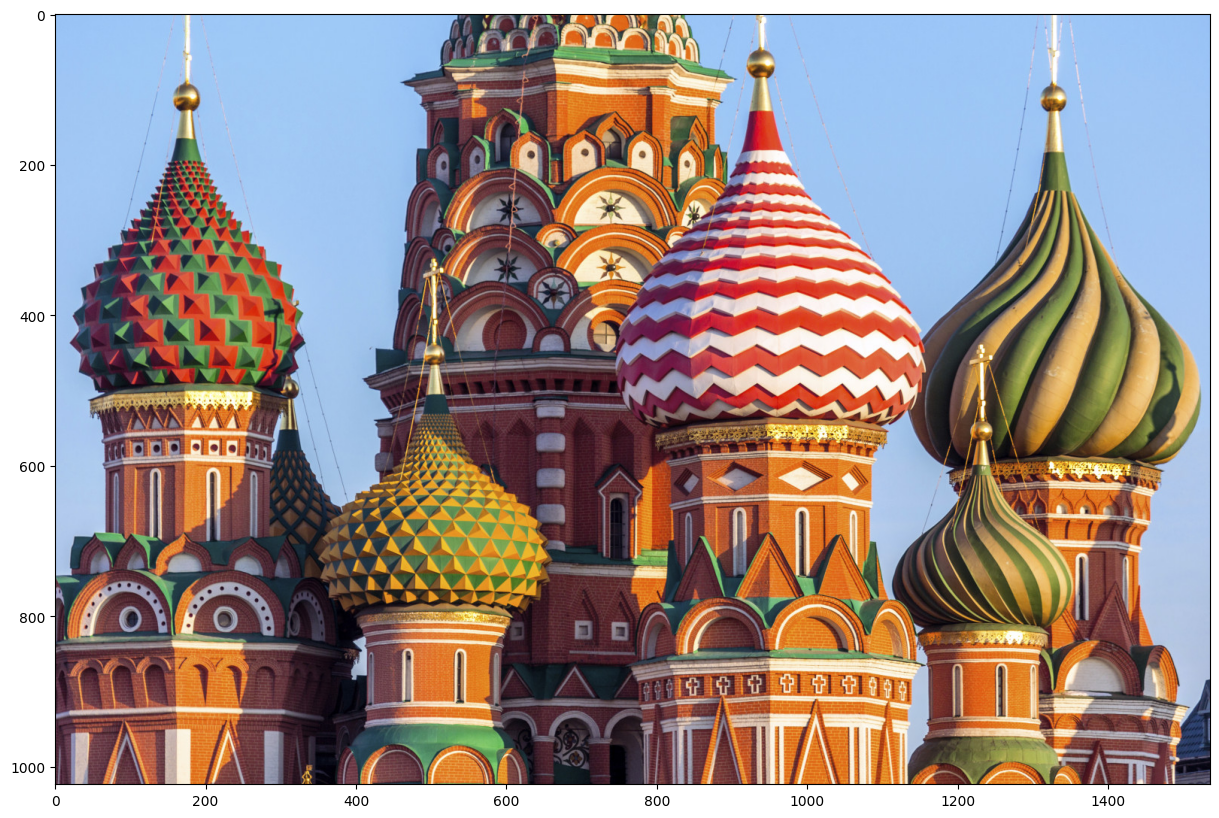

In [4]:
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(20, 10))
plt.imshow(imagem)

In [5]:
cv2.imwrite("russian2.jpg", imagem)

True

In [6]:
(r, g, b) = imagem[0, 0]

print(r, g, b)

152 194 244


In [7]:
imagem[0:300, 0:800] = (122, 120, 11)
(r, g, b) = imagem[0, 0]


print(r, g, b)

122 120 11


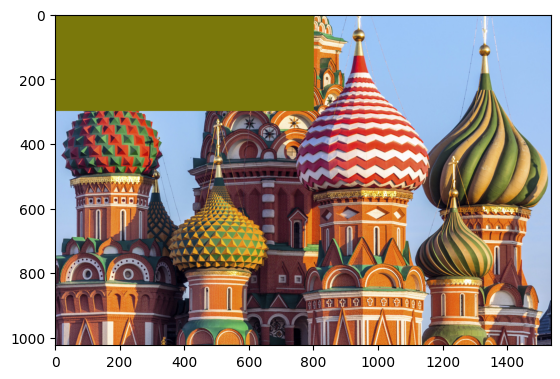

In [8]:
plt.imshow(imagem)

In [9]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

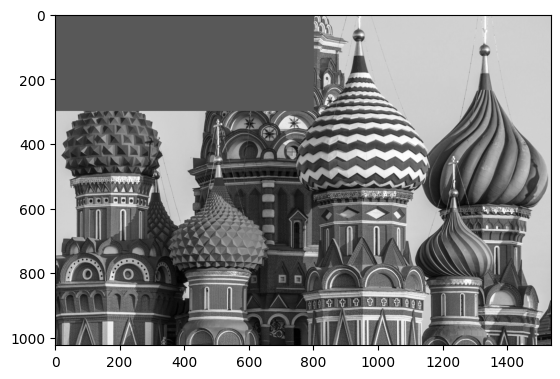

In [10]:
plt.imshow(imagem_gray, cmap="gray")

In [11]:
g = imagem_gray[0, 0]
print(g)

88


In [12]:
imagem_gray.shape

(1024, 1536)

In [13]:
imagem.shape

(1024, 1536, 3)

In [14]:
r, g, b = cv2.split(imagem)

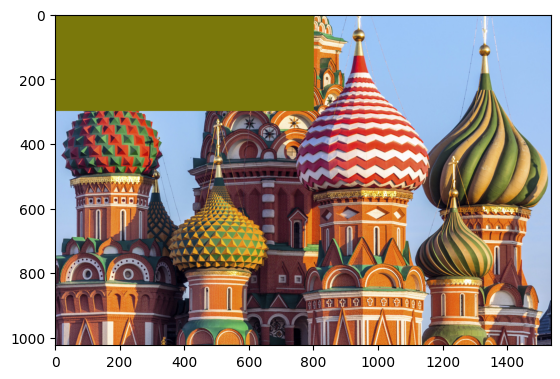

In [15]:
plt.imshow(imagem)

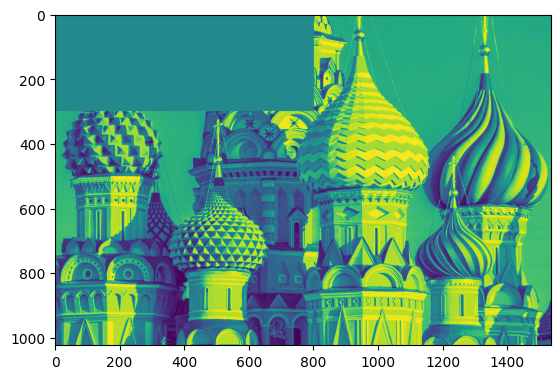

In [16]:
plt.imshow(r)

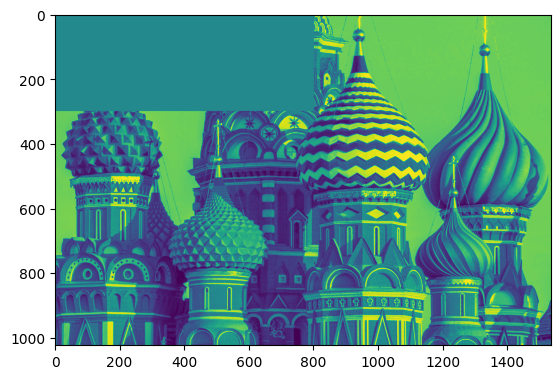

In [17]:
plt.imshow(g)

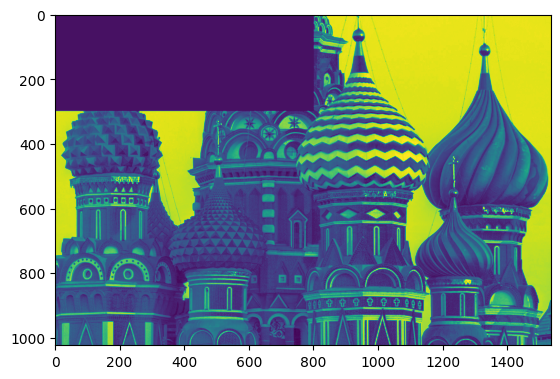

In [18]:
plt.imshow(b)

Text(0.5, 1.0, 'Russia Blue')

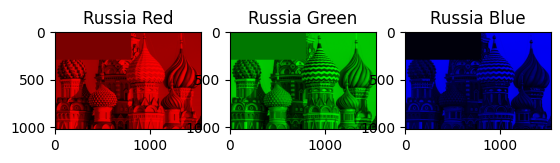

In [19]:
r, g, b = cv2.split(imagem)
imagem_vazia = np.zeros(imagem.shape[:2], dtype=np.uint8)

plt.subplot(1, 3, 1)
plt.imshow(cv2.merge([r, imagem_vazia, imagem_vazia]))
plt.title("Russia Red")

plt.subplot(1, 3, 2)
plt.imshow(cv2.merge([imagem_vazia, g, imagem_vazia]))
plt.title("Russia Green")

plt.subplot(1, 3, 3)
plt.imshow(cv2.merge([imagem_vazia, imagem_vazia, b]))
plt.title("Russia Blue")

In [20]:
imagem_vazia

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
imagem = cv2.imread(files[0], cv2.IMREAD_COLOR)

img_hsv = cv2.cvtColor(imagem, cv2.COLOR_RGB2HSV)

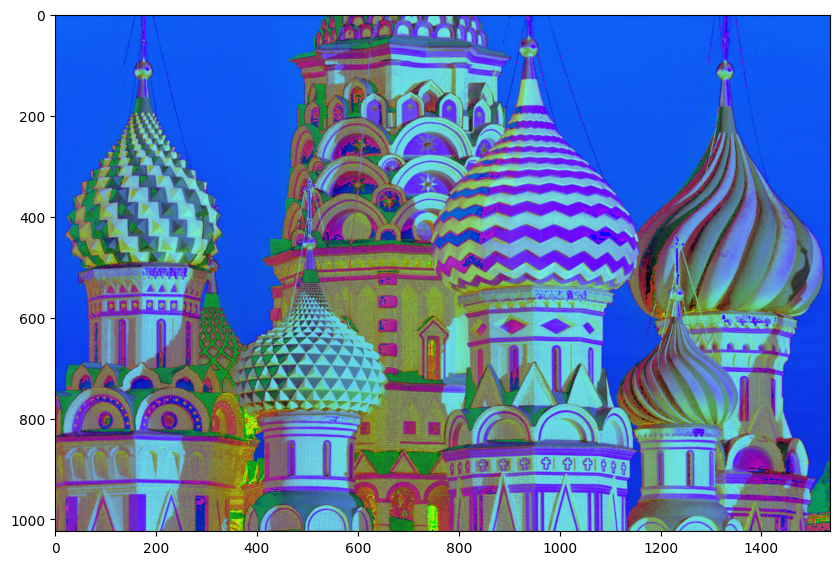

In [22]:
plt.figure(figsize=(10, 8))

plt.imshow(img_hsv)

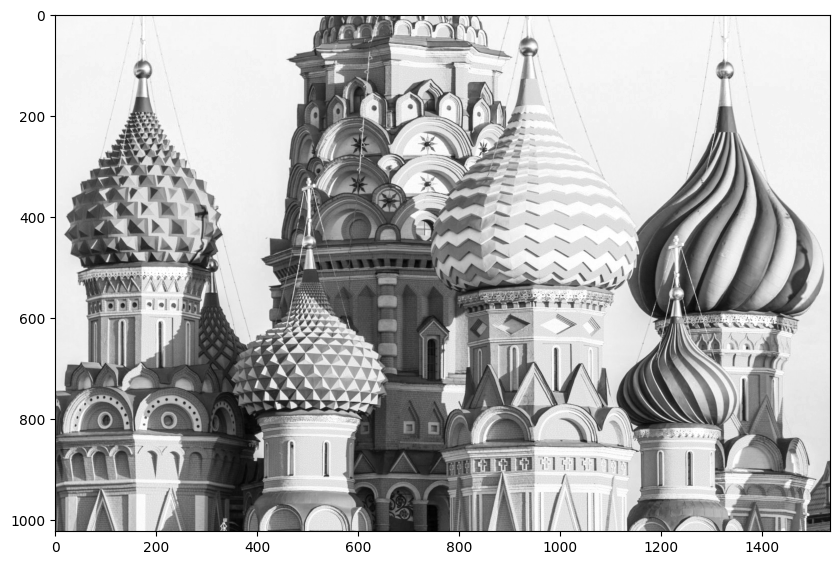

In [23]:
plt.figure(figsize=(10, 8))

plt.imshow(img_hsv[1:, 1:, 2:], cmap="gray");

In [24]:
files

['imagens/russia.jpg',
 'imagens/blue-man-group.jpg',
 'imagens/willy-wonka.jpg',
 'imagens/tv-image-test.png',
 'imagens/seven.jpg']

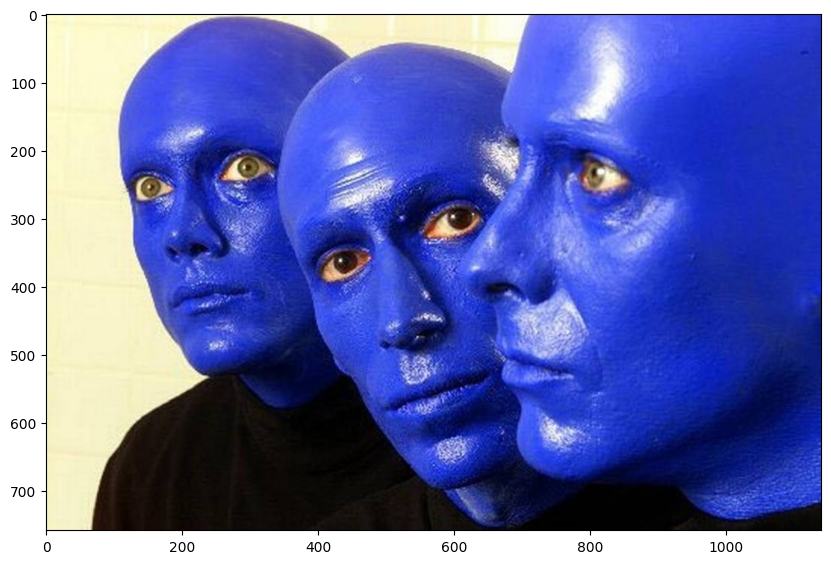

In [25]:
imagem = cv2.imread(files[1], cv2.IMREAD_COLOR)
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(imagem);

In [26]:
cores = {"r": 0, "g": 1, "b": 2}

In [27]:
def hist_bgr(imagem):
    for cor in cores:
        histograma = cv2.calcHist([imagem], [cores[cor]], None, [256], [0, 256])
        plt.plot(histograma)
        plt.xlim([0, 256])


def hist_sat(imagem_hsv):
    imagem_hsv = cv2.cvtColor(imagem_hsv, cv2.COLOR_BGR2HSV)
    hist_hue = cv2.calcHist([imagem_hsv], [0], None, [180], [0, 180])
    plt.plot(hist_hue);

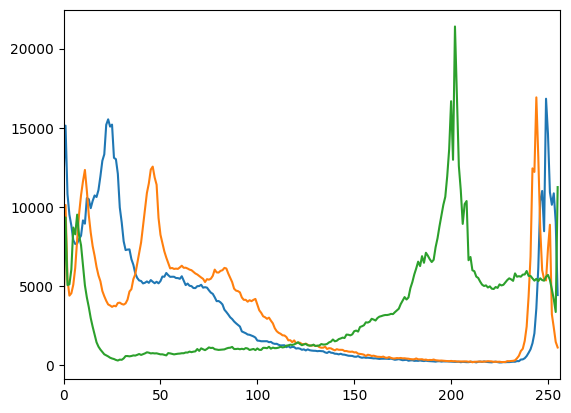

In [28]:
hist_bgr(imagem)

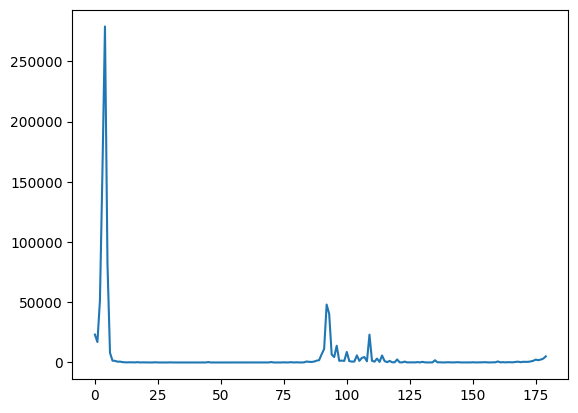

In [29]:
hist_sat(imagem)

In [30]:
img = np.zeros((512, 512, 3), np.uint8)

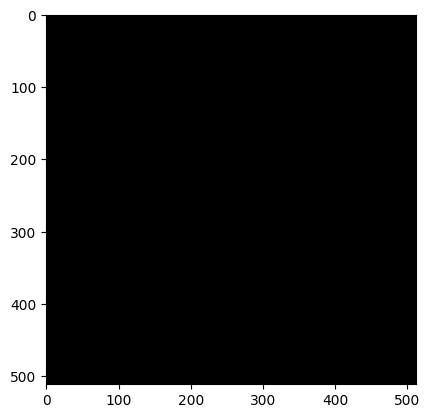

In [31]:
plt.imshow(img)

In [32]:
img_gray = np.zeros((512, 512), np.uint8)

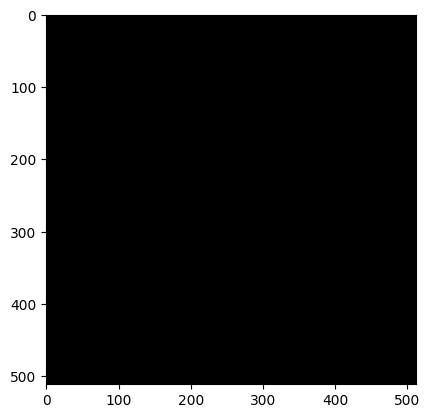

In [33]:
plt.imshow(img_gray, cmap="gray")

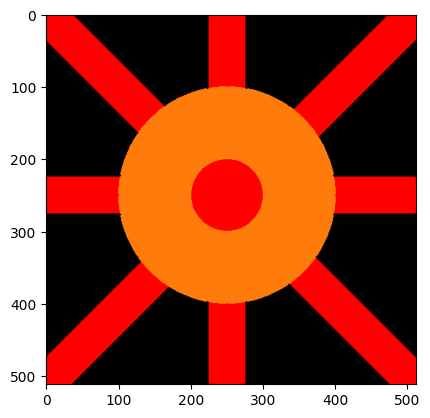

In [34]:
img = np.zeros((512, 512, 3), np.uint8)
cv2.line(img, (0, 0), (510, 510), (255, 0, 0), 50)
cv2.line(img, (0, 510), (510, 0), (255, 0, 0), 50)
cv2.line(img, (250, 510), (250, 0), (255, 0, 0), 50)
cv2.line(img, (0, 250), (510, 250), (255, 0, 0), 50)
cv2.circle(img, (250, 250), 100, (255, 123, 12), 100)

plt.imshow(img)

In [35]:
h, w = img.shape[:2]
matriz_rotacao = cv2.getRotationMatrix2D((50, 500), 10, 1)
print(matriz_rotacao)

[[  0.98480775   0.17364818 -86.06447648]
 [ -0.17364818   0.98480775  16.27853238]]


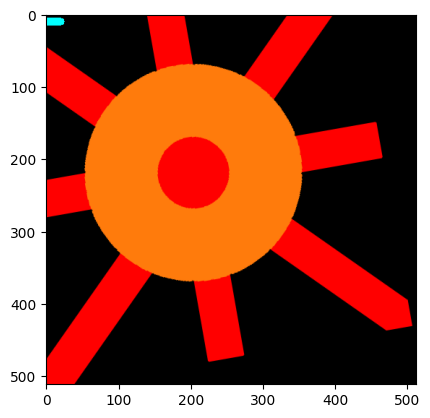

In [36]:
img = cv2.warpAffine(img, matriz_rotacao, (w, h))
cv2.line(img, (0, 10), (20, 10), (0, 255, 255), 10)

plt.imshow(img)

In [37]:
h, w = img.shape[:2]
h_alt, w_alt = h / 4, w / 4

matriz_translacao = np.float32([[1, 0, 200], [0, 1, 0]])
print(matriz_translacao)

[[  1.   0. 200.]
 [  0.   1.   0.]]


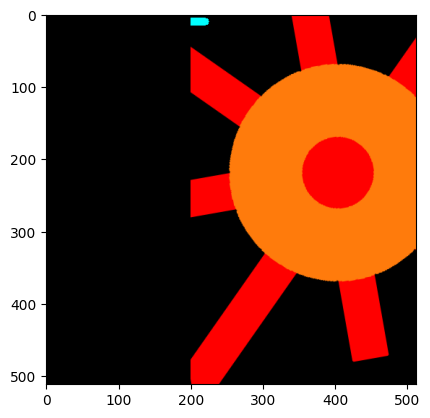

In [38]:
img = cv2.warpAffine(img, matriz_translacao, (w, h))

plt.imshow(img)

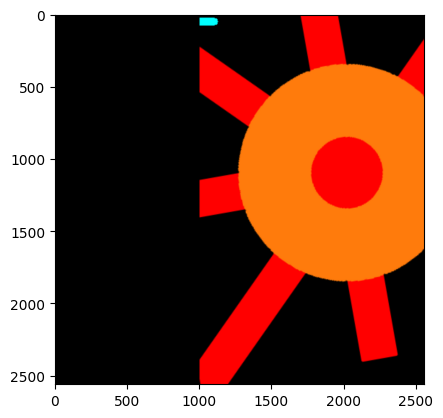

In [39]:
fx = 5
fy = 5

img = cv2.resize(img, None, fx=fx, fy=fy)
plt.imshow(img)

In [40]:
img = np.zeros((512, 512, 3), np.uint8)
cv2.line(img, (0, 0), (510, 510), (255, 0, 0), 50)
cv2.line(img, (0, 510), (510, 0), (255, 0, 0), 50)
cv2.line(img, (250, 510), (250, 0), (255, 0, 0), 50)
cv2.line(img, (0, 250), (510, 250), (255, 0, 0), 50)
cv2.circle(img, (250, 250), 100, (255, 123, 12), 100)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

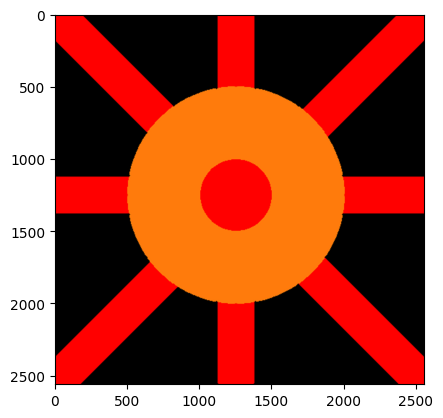

In [41]:
img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

In [42]:
img = np.zeros((512, 512, 3), np.uint8)
cv2.line(img, (0, 0), (510, 510), (255, 0, 0), 50)
cv2.line(img, (0, 510), (510, 0), (255, 0, 0), 50)
cv2.line(img, (250, 510), (250, 0), (255, 0, 0), 50)
cv2.line(img, (0, 250), (510, 250), (255, 0, 0), 50)
cv2.circle(img, (250, 250), 100, (255, 123, 12), 100)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

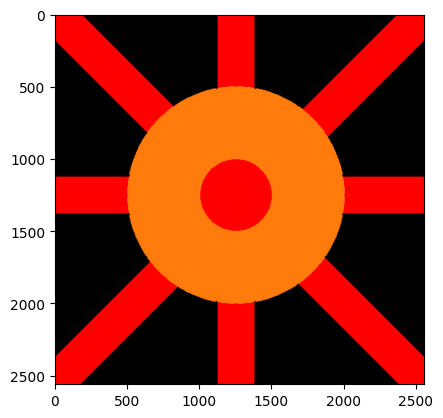

In [43]:
img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_AREA)
plt.imshow(img)

In [44]:
img = np.zeros((512, 512, 3), np.uint8)
cv2.line(img, (0, 0), (510, 510), (255, 0, 0), 50)
cv2.line(img, (0, 510), (510, 0), (255, 0, 0), 50)
cv2.line(img, (250, 510), (250, 0), (255, 0, 0), 50)
cv2.line(img, (0, 250), (510, 250), (255, 0, 0), 50)
cv2.circle(img, (250, 250), 100, (255, 123, 12), 100)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

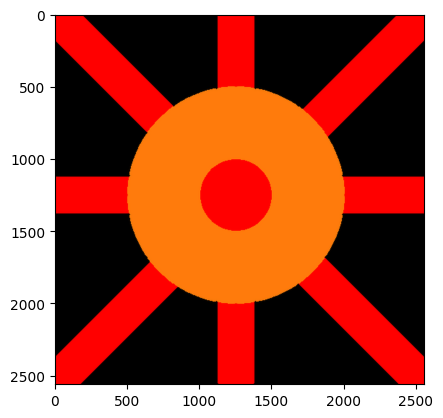

In [45]:
img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LANCZOS4)
plt.imshow(img)

In [46]:
img = np.zeros((512, 512, 3), np.uint8)
cv2.line(img, (0, 0), (510, 510), (255, 0, 0), 50)
cv2.line(img, (0, 510), (510, 0), (255, 0, 0), 50)
cv2.line(img, (250, 510), (250, 0), (255, 0, 0), 50)
cv2.line(img, (0, 250), (510, 250), (255, 0, 0), 50)
cv2.circle(img, (250, 250), 100, (255, 123, 12), 100)

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

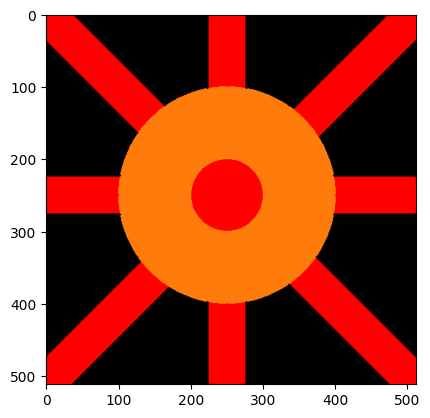

In [47]:
plt.imshow(img)

In [48]:
p1 = (100, 400)
p2 = (400, 400)
p3 = (100, 100)
p4 = (400, 100)

tamanho_final = (700, 700)

pontos_marcadores = np.float32([p1, p2, p3, p4])
pontos_destino = np.float32(
    [(0, 0), (tamanho_final[0], 0), (0, tamanho_final[1]), tamanho_final]
)

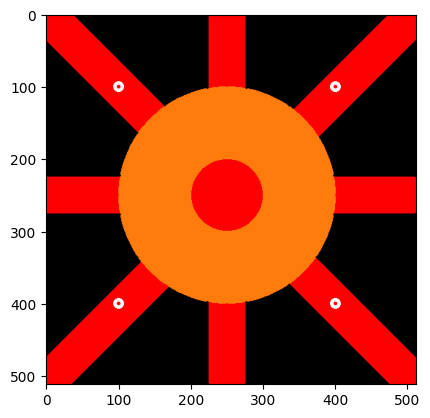

In [49]:
cv2.circle(img, p1, 5, (255, 255, 255), 3)
cv2.circle(img, p2, 5, (255, 255, 255), 3)
cv2.circle(img, p3, 5, (255, 255, 255), 3)
cv2.circle(img, p4, 5, (255, 255, 255), 3)

plt.imshow(img)

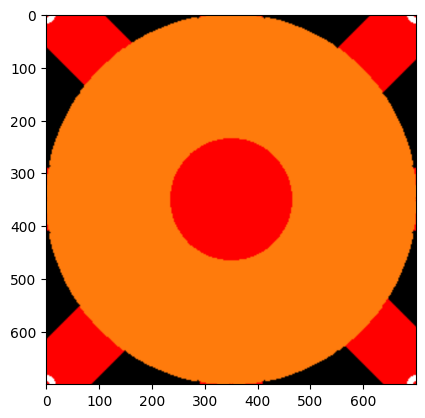

In [50]:
matriz_perspectiva = cv2.getPerspectiveTransform(pontos_marcadores, pontos_destino)
img = cv2.warpPerspective(img, matriz_perspectiva, tamanho_final)
plt.imshow(img)

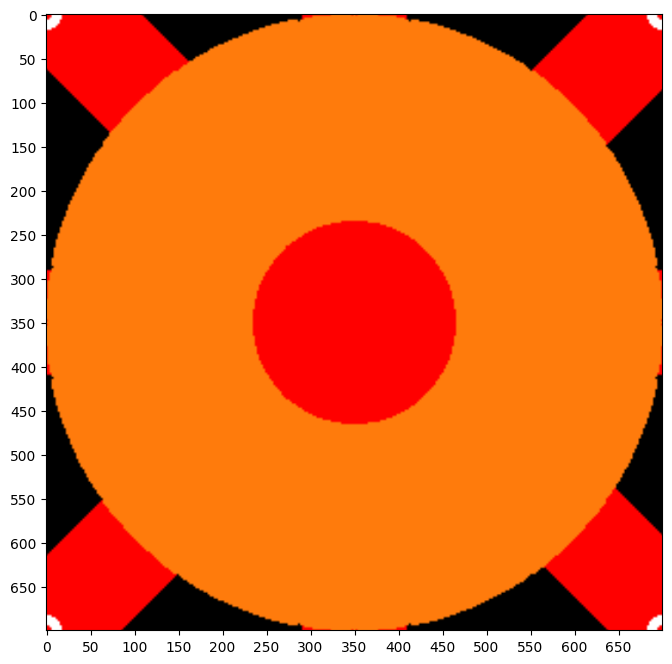

In [51]:
plt.figure(figsize=(10, 8))

plt.xticks(list(range(0, 800, 50)))
plt.yticks(list(range(0, 800, 50)))
plt.imshow(img)

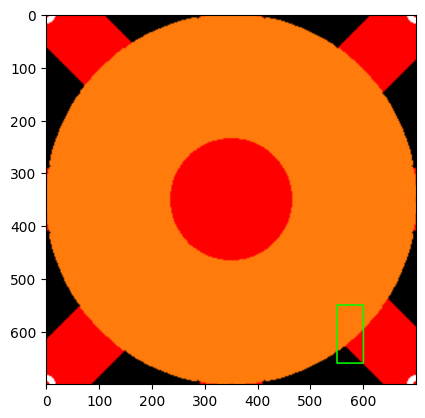

In [52]:
linha_y_inicio, coluna_x_inicio = 550, 550
linha_y_final, coluna_x_final = 660, 600

cv2.rectangle(
    img,
    (coluna_x_inicio, linha_y_inicio),
    (coluna_x_final, linha_y_final),
    (0, 255, 0),
    2,
)
plt.imshow(img)

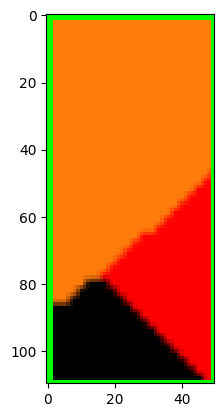

In [53]:
roi = img[linha_y_inicio:linha_y_final, coluna_x_inicio:coluna_x_final]
plt.imshow(roi)

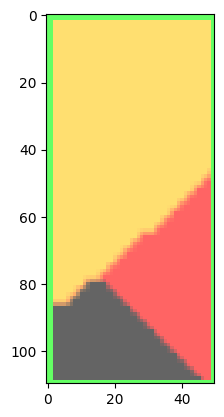

In [54]:
matriz_brilho = np.ones(roi.shape, np.uint8) * 100
roi = cv2.add(roi, matriz_brilho)
plt.imshow(roi)

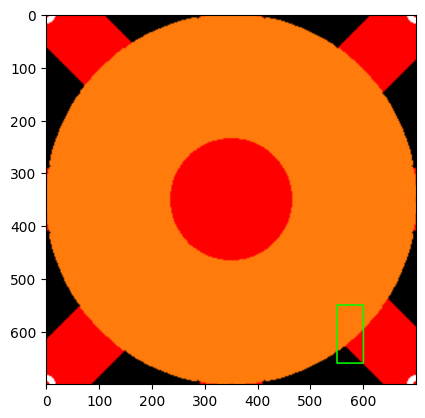

In [55]:
plt.imshow(img)

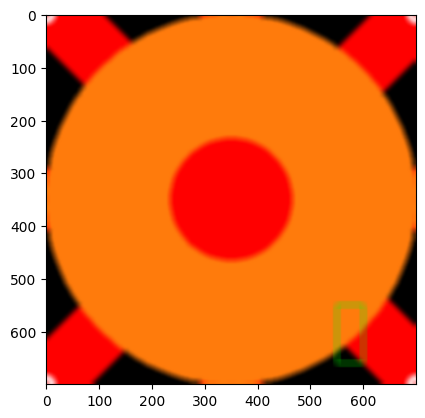

In [56]:
blur_img = cv2.blur(img, (15,15))
plt.imshow(blur_img)

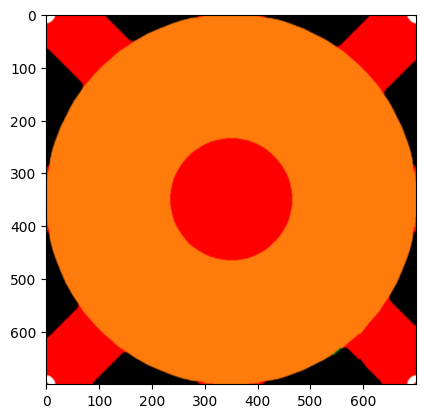

In [57]:
blur_img = cv2.medianBlur(img, 15)
plt.imshow(blur_img)

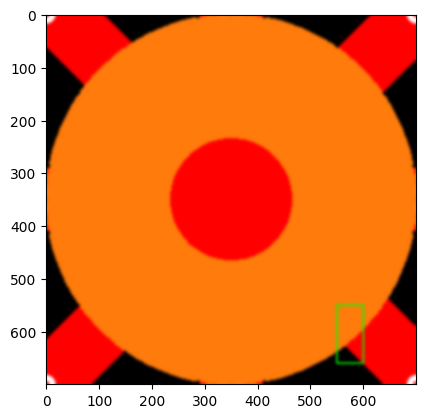

In [58]:
blur_img = cv2.GaussianBlur(img, (15,15), 0)
plt.imshow(blur_img)

In [59]:
def sp_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

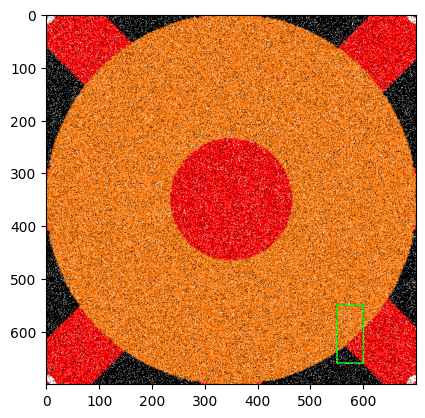

In [60]:
img_ruido = sp_noise(img, 0.10)
plt.imshow(img_ruido)

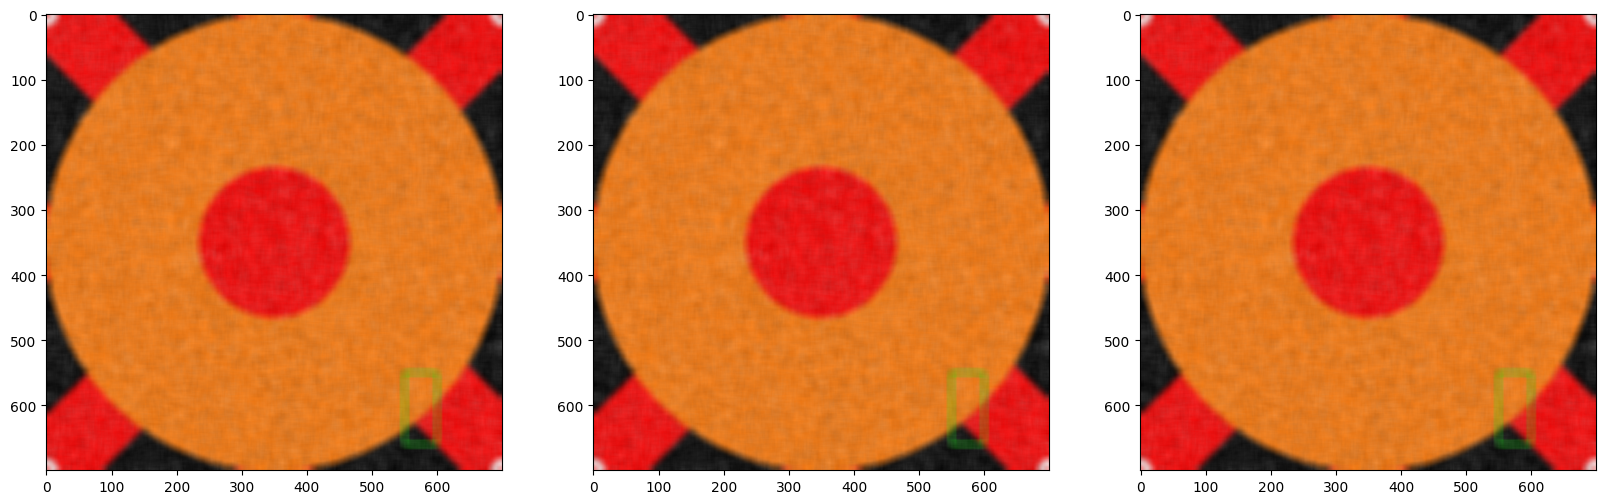

In [61]:
plt.figure(figsize = (20, 8))

for i in range(1, 4):
    plt.subplot(1, 3, i)
    blur_img = cv2.GaussianBlur(img_ruido, (15,15), 0)
    plt.imshow(blur_img)
    blur_img2 = cv2.medianBlur(img_ruido, 15)
    plt.imshow(blur_img2)
    blur_img3 = cv2.blur(img_ruido, (15,15))
    plt.imshow(blur_img3)

    
    

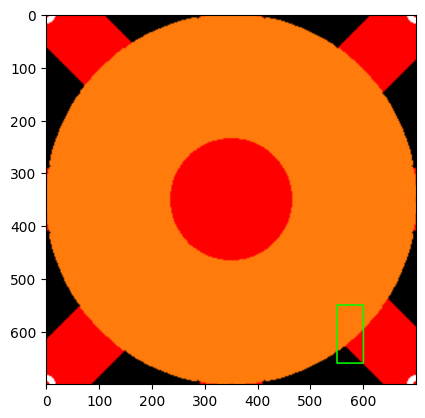

In [62]:
plt.imshow(img)

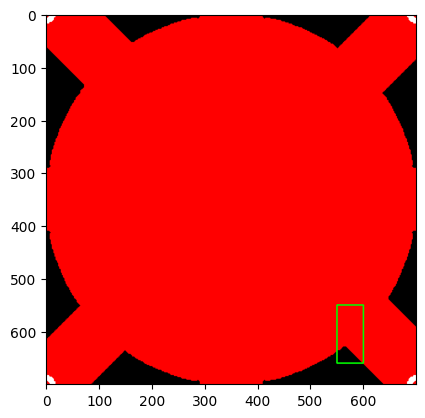

In [63]:
ret, img_limiar = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
plt.imshow(img_limiar, cmap = "gray")

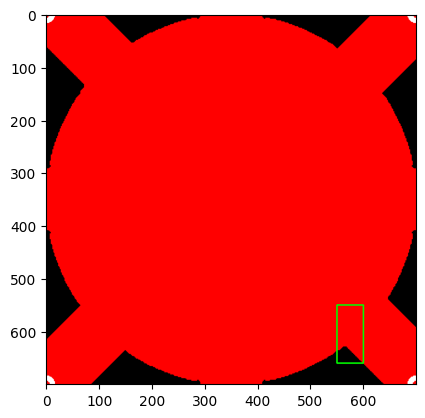

In [65]:
ret, img_limiar = cv2.threshold(img, 190, 255, cv2.THRESH_BINARY)
plt.imshow(img_limiar, cmap = "gray")